# Tutorial 03 - Working with Multiple Ephys Files

So far we have used the pyeCAP.Ephys class to load in a and work with a single data set at a time. Often when we collect electrophysiology data, we collect multiple data sets with a similar experimental setup. It is common to want to analyze these data sets in the same way. For this reason pyeCAP was designed around being able to work with multiple data sets at on time. Due to the fact that pyeCAP relies on lazy computation, 'loading' and working with multiple data sets usually has minimal computional cost compared to working with a single data set.

In the previous tutorial we used the following code to read in a single dataset:
    directory = 'C:/Users/james/OneDrive/Documents/Data/pyeCAP/TDT/pnpig200113-200113-142737'
    data = pyeCAP.Ephys(directory)
    
We can instead load in a series of data sets by passing a list of file paths to pyeCAP.Ephys. Here we import pyeCAP and then create a list of file paths for a series of TDT data tanks collected as part of the same experiment. To create the list of data sets, we will use the python glob module (https://docs.python.org/3/library/glob.html) which provides a nice way to work with directories of files in python. However, there are many ways that this could be done.

In [1]:
# TODO: edit description code.

# import statements
import pyeCAP

# put matplotlib in widget mode so that we can use interactive plots
# %matplotlib widget 

# Tdt tanks that will be used in the analysis
tdt_tanks = [r"C:\Users\malal\Documents\WITNE\pyCAP\TutorialExamples\pnpig191126-191204-151801", r"C:\Users\malal\Documents\WITNE\pyCAP\TutorialExamples\pnpig191126-191204-152107"]

c:\users\malal\documents\witne\pycap\pyecap\pyeCAP\io\ripple_io.py:13: UserWarning: No Neuroshare package found, Ripple files will not work
  warnings.warn("No Neuroshare package found, Ripple files will not work")


This is our list of file_paths for 10 tdt tanks that were part of this experiment. We can easily load in these data sets using pyeCAP.Ephys.

In [2]:
data = pyeCAP.Ephys(tdt_tanks, stores=['RawE', "RawG"])

read from t=0s to t=153.36s
read from t=0s to t=102.36s


## Exploring Multiple Data Sets as One Object

These are 10 data sets that were recorded during the same experiment. Let's check that our ephys object contains the data we expect. We can see the number of data sets using the *data* propoerty.

In [3]:
data.ndata

2

These data sets were collected on the same day. We can easily check what the start and end times of each data set are uing the properties:
* start_times
 - Returns a list of start times in seconds since epoch (0 point used for computers).
* end_times
 -  Returns a list of end times in seconds since epoch.
 
However, if we just want to get a quick idea for when the data sets were collected relative to each other. We can use the plot_times method to show a plot of the start and stop points for each data set.

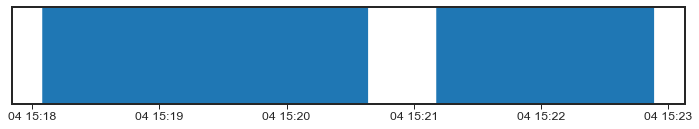

In [4]:
data.plot_times()

We can see that we have 10 data sets recorded over a span of around 3 hours with variable gaps in between. Similar to the last tutorial, we will want to set the set the channel names and types. Once again these data sets contain 8 channels from two TDT streams. The first 4 channels (channels 0-3) are LIFE electrode data, channels 4-6 are EMG data, and channel 7 is unused. We will set the channels and channel names slightly differntly than we did last time.

Since we only want to access the renamed data, we will overwrite out origional data variable to minimize the extra variables in our namespace.

In [5]:
# Starting by removing the excess channel 'RawG 4'. We could do this either by the index in the channel list (7) or using the channel name directly. 
data = data.remove_ch('RawG 4')

# We can rename the channels using the set_ch_names method and providing a list of new channel names that matches the number of channels in the data set.
data = data.set_ch_names(['LIFE 1', 'LIFE 2', 'LIFE 3', 'LIFE 4', 'EMG 1', 'EMG 2', 'EMG 3'])

# Lets also set the types of the individual channels so that we can indepentently interact with LIFE and EMG channels
data = data.set_ch_types(['LIFE']*4 + ['EMG']*3)

Similar to the last tutorial. We can create an interactive plot of the data sets. This time you will see black lines on the scrollbar axis below the plot demarkating the gaps between data sets.

c:\users\malal\documents\witne\pycap\pyecap\pyeCAP\base\utils\visualization.py:61: UserWarning: Interactive backend required to plotting in 'notebook' mode. Use Jupyter Notebook magic function '%matplotlib widget' to set matplotlib to use an interactive backend. Falling back to using a non-interactive backend for plotting.
  warnings.warn("Interactive backend required to plotting in 'notebook' mode. Use Jupyter Notebook magic "


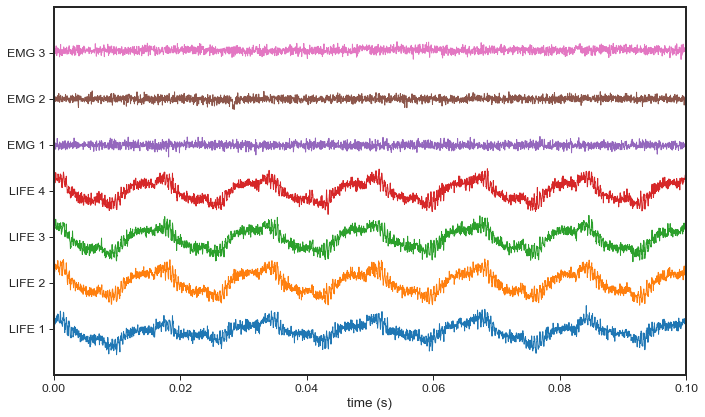

In [6]:
data.plot(x_lim = (0,0.1), show='notebook')

## Working with Multiple Data Sets as an Array

Similar to the case of a single data set, multiple data sets can be accessed as an array. The shape of the array is equal to: *number of channels* x *total data points in all data sets*

There are a couple of properties that are worth knowing about when working with multiple data sets. You have already seen *ndata* earlier in this tutorial:
* ndata
 - Number of data sets loaded into an ephys object
* shapes
 - List containing shapes of each dataset.
* start_indices
 - Indices within the array at which each dataset start.

Here, the number of columns in the *data* array is equal to the total number of data points in each TDT tank loaded into the data set. 

In [7]:
data.shape

(7, 6242304)

These shapes of these individual data sets can be obtained by:

In [8]:
data.shapes

[(7, 3743744), (7, 2498560)]

As well as the corresponding start_indices for each data set within the array.

In [9]:
data.start_indices

array([      0, 3743744])